#### This step of the DSM focuses on collecting data, organizing it, cleanining it, and making sure it's well defined.

# Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file

In [2]:
# the supplied CSV data file is the raw_data directory

appliances_data = pd.read_csv('C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/raw_data/energydata.csv')


# Data Science Problem

#### The purpose of this data science project is to come up with a model to predict the applainces energy usage based on consumner's house temperature and humidity conditions plus the enviromental conditions ouside the house. 

#### Good first steps in auditing the data are the info method and displaying the first few records with head.

In [3]:
appliances_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### There are 19735 entries (rows) and a total of 29 columns.

#### 'Appliances' is the electricity usage in Wh for appliances in the house (our target variable) and the other columns are potential features.

In [4]:
appliances_data.head().T

,0,1,2,3,4
date,2016-01-11 17:00:00,2016-01-11 17:10:00,2016-01-11 17:20:00,2016-01-11 17:30:00,2016-01-11 17:40:00
Appliances,60,60,50,50,60
lights,30,30,30,40,40
T1,19.89,19.89,19.89,19.89,19.89
RH_1,47.596667,46.693333,46.3,46.066667,46.333333
T2,19.2,19.2,19.2,19.2,19.2
RH_2,44.79,44.7225,44.626667,44.59,44.53
T3,19.79,19.79,19.79,19.79,19.79
RH_3,44.73,44.79,44.933333,45.0,45.0
T4,19.0,19.0,18.926667,18.89,18.89


# Exploring The Data

In [5]:
appliances_data.isnull().values.any() # checking for null values 

False

In [6]:
duplicates = appliances_data.duplicated().value_counts() # checking for duplicate values
duplicates

False    19735
dtype: int64

In [7]:
appliances_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

#### **_This is a data set with no missing or duplicate values_ :)**

###### **_Renaming columns for more readability based on the variable description file included with the data set_**

1) date time year-month-day hour:minute:second

2) Appliances, energy use in Wh

3) lights, energy use of light fixtures in the house in Wh

4) T1, Temperature in kitchen area, in Celsius

5) RH_1, Humidity in kitchen area, in %

6) T2, Temperature in living room area, in Celsius

7) RH_2, Humidity in living room area, in %

8) T3, Temperature in laundry room area

9) RH_3, Humidity in laundry room area, in %

10) T4, Temperature in office room, in Celsius

11) RH_4, Humidity in office room, in %

12) T5, Temperature in bathroom, in Celsius

13) RH_5, Humidity in bathroom, in %

14) T6, Temperature outside the building (north side), in Celsius

15) RH_6, Humidity outside the building (north side), in %

16) T7, Temperature in ironing room , in Celsius

17) RH_7, Humidity in ironing room, in %

18) T8, Temperature in teenager room 2, in Celsius

19) RH_8, Humidity in teenager room 2, in %

20) T9, Temperature in parents room, in Celsius

21) RH_9, Humidity in parents room, in %

22) To, Temperature outside (from Chièvres weather station), in Celsius

23) Pressure (from Chièvres weather station), in mm Hg

24) RH_out, Humidity outside (from Chièvres weather station), in %

25) Windspeed (from Chièvres weather station), in m/s

26) Visibility (from Chièvres weather station), in km

27) Tdewpoint (from Chièvres weather station), °C

28) rv1, Random variable 1, nondimensional

29) rv2, Rnadom variable 2, nondimensional


In [8]:
appliances_data= appliances_data.rename(index=str, columns={"Appliances":"Appliances_E_Wh", "lights": "Lights_E_Wh","T1":"T_Kitchen", "RH_1":"H_Kitchen", "T2":"T_Living", "RH_2":"H_Living", "T3":"T_Laundry", "RH_3":"H_Laundry", "T4":"T_Office", "RH_4":"H_Office", "T5":"T_Bathroom", "RH_5":"H_Bathroom", "T6":"T_Building_out_NS", "RH_6":"H_Building_out_NS",
"T7":"T_Ironning", "RH_7":"H_Ironing", "T8":"T_Teenager", "RH_8":"H_Teenager", "T9":"T_Parents", "RH_9":"H_Parents", "Press_mm_hg": "Press_out", "RH_out":"H_out", "rv1":"RV_1", "rv2": "RV_2"})

In [9]:
appliances_data.head().T

,0,1,2,3,4
date,2016-01-11 17:00:00,2016-01-11 17:10:00,2016-01-11 17:20:00,2016-01-11 17:30:00,2016-01-11 17:40:00
Appliances_E_Wh,60,60,50,50,60
Lights_E_Wh,30,30,30,40,40
T_Kitchen,19.89,19.89,19.89,19.89,19.89
H_Kitchen,47.596667,46.693333,46.3,46.066667,46.333333
T_Living,19.2,19.2,19.2,19.2,19.2
H_Living,44.79,44.7225,44.626667,44.59,44.53
T_Laundry,19.79,19.79,19.79,19.79,19.79
H_Laundry,44.73,44.79,44.933333,45.0,45.0
T_Office,19.0,19.0,18.926667,18.89,18.89


In [10]:
appliances_data['date'] = pd.to_datetime(appliances_data['date'])  # converting date column to date type

In [11]:
appliances_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19735 non-null  datetime64[ns]
 1   Appliances_E_Wh    19735 non-null  int64         
 2   Lights_E_Wh        19735 non-null  int64         
 3   T_Kitchen          19735 non-null  float64       
 4   H_Kitchen          19735 non-null  float64       
 5   T_Living           19735 non-null  float64       
 6   H_Living           19735 non-null  float64       
 7   T_Laundry          19735 non-null  float64       
 8   H_Laundry          19735 non-null  float64       
 9   T_Office           19735 non-null  float64       
 10  H_Office           19735 non-null  float64       
 11  T_Bathroom         19735 non-null  float64       
 12  H_Bathroom         19735 non-null  float64       
 13  T_Building_out_NS  19735 non-null  float64       
 14  H_Building_

In [12]:
df = appliances_data   # calling our tidy DataFrame df

In [13]:
df = df.drop(["RV_1", "RV_2"],axis=1)  # dropping two random variables

# Numeric Features

In [14]:
df.describe().T  #statistical summary of the numerical columns

,count,mean,std,min,25%,50%,75%,max
Appliances_E_Wh,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
Lights_E_Wh,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T_Kitchen,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
H_Kitchen,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T_Living,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
H_Living,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T_Laundry,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
H_Laundry,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T_Office,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
H_Office,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


Appliances_E_Wh values range from 10 Wh to 1080 Wh with a mean of 97.7. 
Inside temperature of the house ranges from 14.9 to 29.9 C. Humidity of the inside ranges from 20.5 to 63.4 %, with the exception of Bathroom with a 96% humidity (which is expected). 

Outside temperature ranges from -6 to 28.3 C. Outside humidity is ranging from 24.0 to 100%. The H_Building_out_NS humidity 
(humidity for north side of the building) has a minimum value of 1 % which seems very low (H_out from a nearby weather station shows a minimum humidity of 14.9.%). Since this is for the north side of the buidling where it gets more sunshine, humidity could get that low. 


###### _Appliances_E_Wh_ std is higehr than mean value! same is true for _Lights_E_Wh_! These seems to be abnormal distributions.  

In [15]:
df['Appliances_E_Wh'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances_E_Wh, dtype: float64

In [16]:
df['Appliances_E_Wh'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Appliances_E_Wh, Length: 92, dtype: int64

##### Majority of the Appliances_E_Wh values are in the 50-80 Wh range.  There are one instances for the 1070 and 1080 values (the max values)

##### Taking a look at the variation of Appliances_E_Wh over time. 

In [18]:
Appliances = df['Appliances_E_Wh']

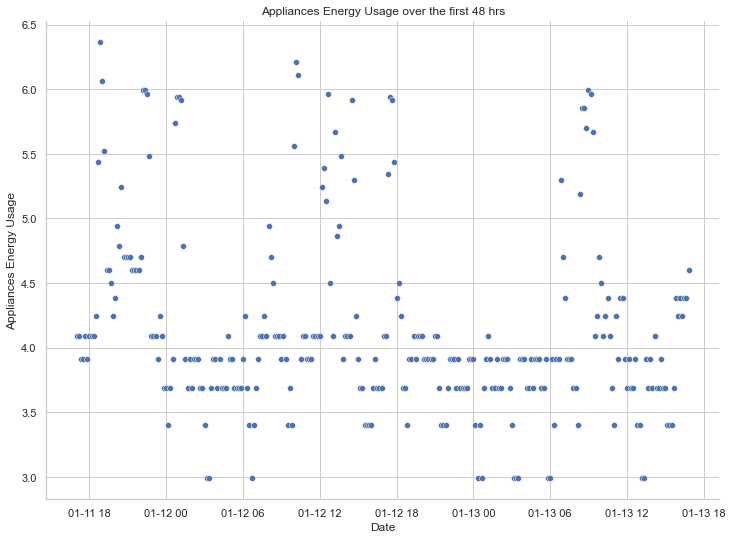

In [29]:
# Appliances_E_Wh variation over the first 48 hr
sns.relplot(data = df[:288], x = 'date'[:288], y ='Appliances_E_Wh'[:144], marker = 'o',     
    kind="scatter")
plt.gcf().set_size_inches(12,8)
plt.ylabel('Appliances Energy Usage')
plt.xlabel('Date')
plt.title('Appliances Energy Usage over the first 48 hrs')
plt.subplots_adjust(wspace=0.5);

###### _The appliances energy consumption is cylclic and there are peak times where the usage is higher during the day_

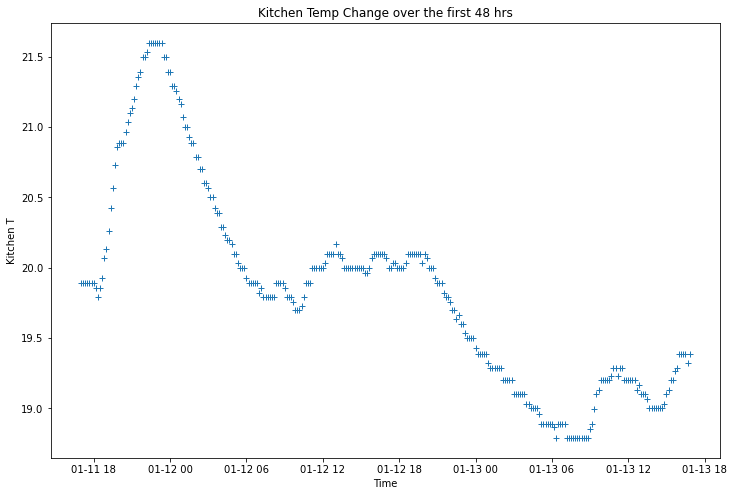

In [20]:
plt.plot(df['date'][:288], df['T_Kitchen'][:288], marker = '+', linestyle = 'none')
plt.gcf().set_size_inches(12,8)
plt.xlabel('Time')
plt.ylabel('Kitchen T')
plt.title('Kitchen Temp Change over the first 48 hrs')
plt.subplots_adjust(wspace=0.5);

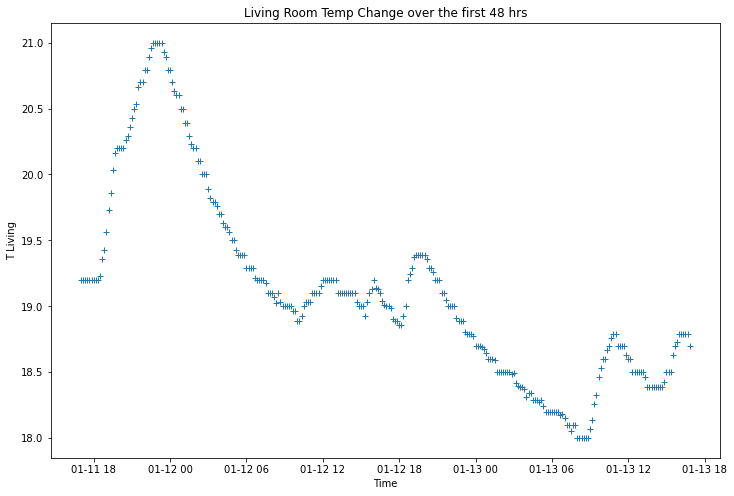

In [21]:
plt.plot(df['date'][:288], df['T_Living'][:288], marker = '+', linestyle = 'none')
plt.gcf().set_size_inches(12,8)
plt.xlabel('Time')
plt.ylabel('T Living')
plt.title('Living Room Temp Change over the first 48 hrs')
plt.subplots_adjust(wspace=0.5);

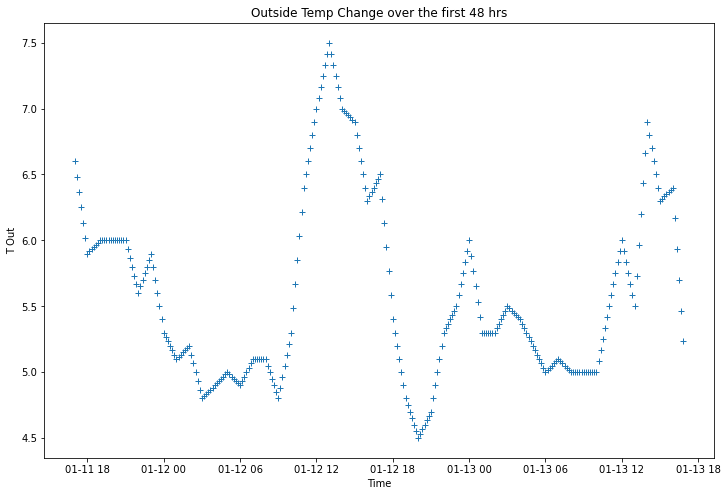

In [22]:
plt.plot(df['date'][:288], df['T_out'][:288], marker = '+', linestyle = 'none')
plt.gcf().set_size_inches(12,8)
plt.xlabel('Time')
plt.ylabel('T Out')
plt.title('Outside Temp Change over the first 48 hrs')
plt.subplots_adjust(wspace=0.5);

###### T_out seems to be in contrast to the inside temps

###### _Generating histograms of the numeric columns_

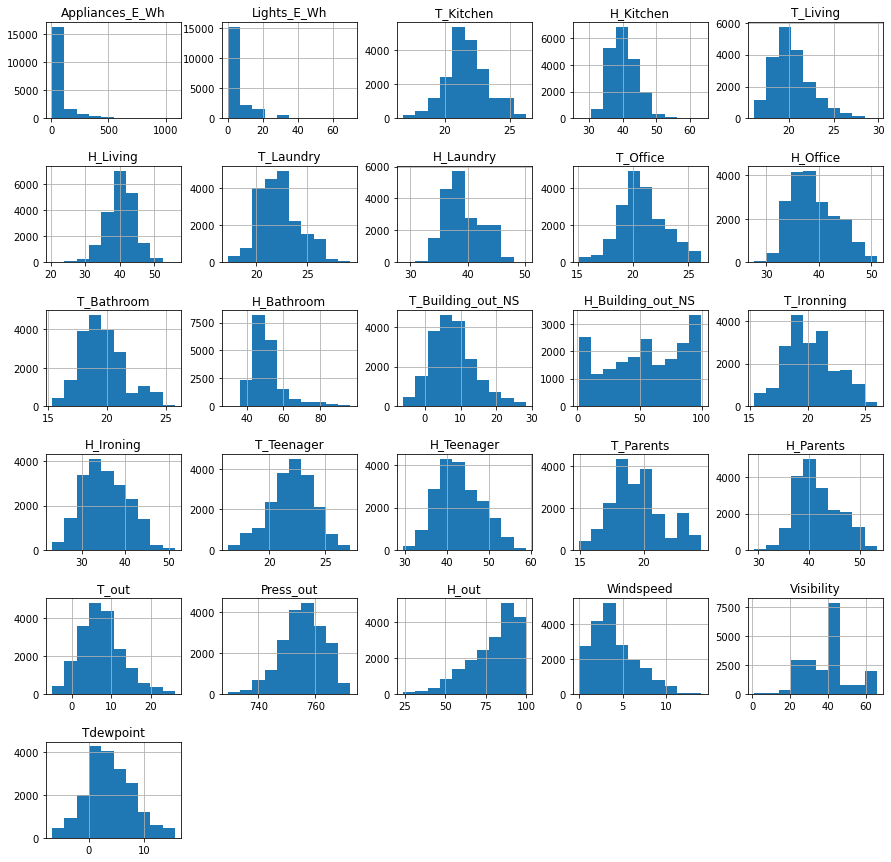

In [23]:
df.drop(['date'],axis=1).hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

###### Appliances_E_Wh & Lights_E_Wh are heavily skewed to the left. H_Building_out_NS_ has a strange distribution and that for H_out is skewed to the right. Visibility also looks abnormal. 

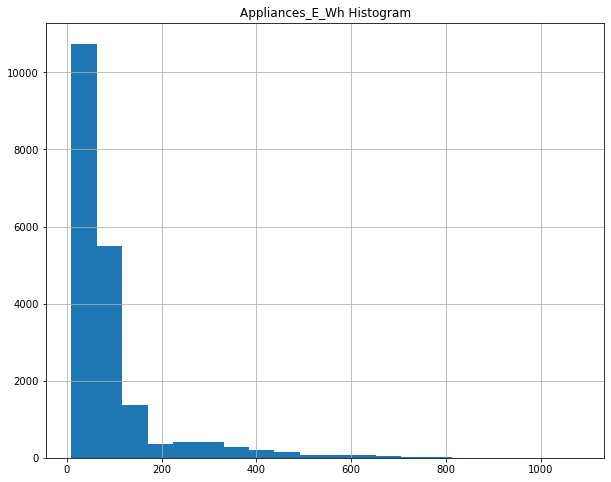

In [24]:
df['Appliances_E_Wh'].hist(bins=20) # Distribution is heavily skewed to the left 
plt.gcf().set_size_inches(10,8)
plt.title('Appliances_E_Wh Histogram')
plt.subplots_adjust(hspace=0.5);

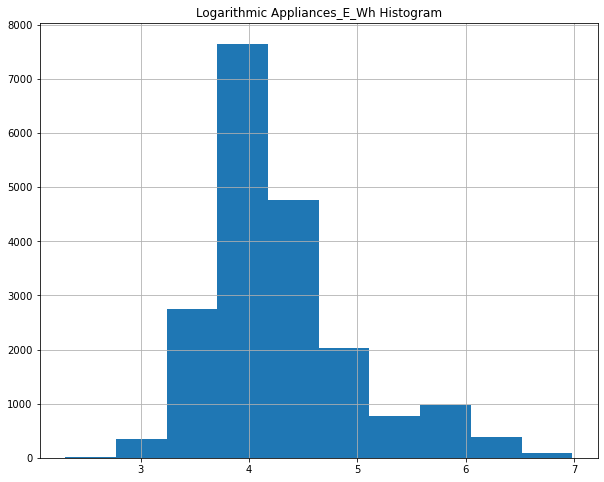

In [25]:
np.log(df['Appliances_E_Wh']).hist()  # log transformation makes the hist plot more appealing and normal
plt.gcf().set_size_inches(10,8)
plt.title('Logarithmic Appliances_E_Wh Histogram')
plt.subplots_adjust(hspace=0.5);

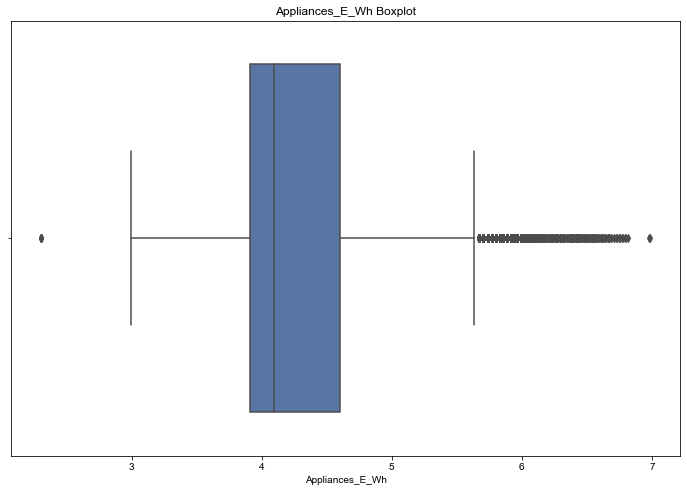

In [26]:
plt.subplots(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(x= np.log(df['Appliances_E_Wh']), data=df)
plt.title('Appliances_E_Wh Boxplot')
plt.subplots_adjust(hspace=0.5);

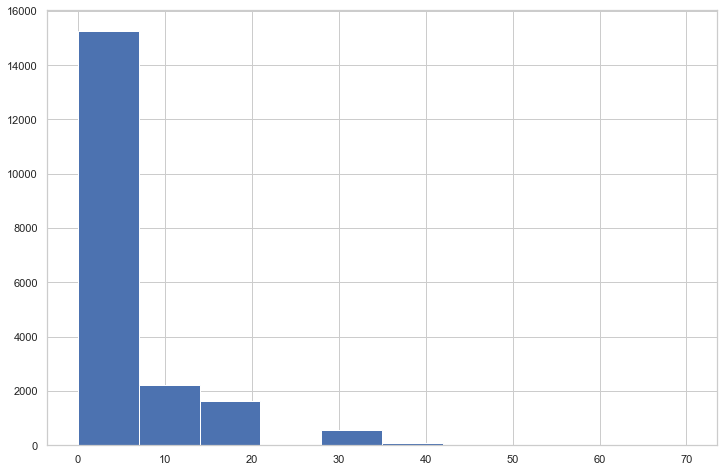

In [27]:
plt.subplots(figsize=(12, 8))
df['Lights_E_Wh'].hist()   # losts of zero since lights won't be used for majority of times during the day
plt.subplots_adjust(hspace=0.5);

In [28]:
df['Appliances_E_Wh'] = np.log(df['Appliances_E_Wh'])  # log transformation of Appliances_E_Wh. We have seen before that this makes the distribution more normal

###### The main steps and tasks that were performed here aimed at taking a closer look at the data and making sense of them to get us closer to the main purpose: coming up with a model to be able to predict appliances usage based on home and enviromental conditions. 

# Save data

In [30]:
# saving the data to a new csv file
datapath = 'C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/Data_Files'
save_file(df, 'appliances_clean_df.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/Data_Files\appliances_clean_df.csv"
